<a href="https://colab.research.google.com/github/ctjong27/Machine_Learning_Sandbox/blob/main/RandomForestClassifier_Keras_GradiantBoost_practices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions:

Your final report should be written up in a Jupyter notebook.  It should be posted to a public Github repo as an ipynb  submitted to this assignment via courseworks.  Please include the link to your Github repo in this ipynb file.

You are welcome, but not required, to add any other country level features you would like to your dataset before using the data to complete your report. 

Your report should include the following information:

*  Explore bivariate results (Use visualizations!)
  *  Describe any relationships you see between particular features and the target variable
*  Examine features that predict happiness categories using one or more models that allow for automatic feature selection
  *  Explain any meaningful findings
*  Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)
  *  submit three models to the model share leaderboard before you start communicating with your team.
  *  After you submit your first three models, describe your best model with your team via your team slack channel
  *  Fit and submit up to three more models after learning from your team.
Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.
  *  Submit your best models to the leaderboard for the World Happiness AI Model Share competition.
     *  You have the option to present and/or discuss these models in your report, but it is not required.

# Data Prep

In [115]:
%%capture
#install aimodelshare library
! pip install aimodelshare --upgrade

#Get competition data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile
  
# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", 'r') as zObject:
  
    # Extracting all the members of the zip 
    # into a specific location.
    zObject.extractall()

In [116]:
# Load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0              Peru           0.960           1.274                    0.854   
1         Nicaragua           0.694           1.325                    0.835   
2            Greece           1.181           1.156                    0.999   
3             Qatar           1.684           1.313                    0.871   
4        Uzbekistan           0.745           1.529                    0.756   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.455       0.083                      0.027   
1                         0.435       0.200                      0.127   
2                         0.067       0.000                      0.034   
3                         0.555       0.220                      0.167   
4                         0.631       0.322                      0.240   

         name    region                       sub-region  Terrorist_attacks  
0        Peru  Americas  Latin America and the Caribbean          18.000000  
1   Nicaragua  Americas  Latin America and the Caribbean         125.611111  
2      Greece    Europe                  Southern Europe         112.000000  
3       Qatar      Asia                     Western Asia          57.333333  
4  Uzbekistan      Asia                     Central Asia         125.611111

In [117]:

y_train_temp = y_train.copy()
# y_train_label_codes = pd.factorize(y_train_labels)[0]
for idx, row in y_train_temp.iterrows():
    if  y_train_temp.loc[idx,'Very High'] == 1:
        y_train_temp.loc[idx,'happiness'] = 5

    elif  y_train_temp.loc[idx,'High'] == 1:
        y_train_temp.loc[idx,'happiness'] = 4

    elif  y_train_temp.loc[idx,'Average'] == 1:
        y_train_temp.loc[idx,'happiness'] = 3

    elif  y_train_temp.loc[idx,'Low'] == 1:
        y_train_temp.loc[idx,'happiness'] = 2

    elif  y_train_temp.loc[idx,'Very Low'] == 1:
        y_train_temp.loc[idx,'happiness'] = 1

df = X_train.copy()
df['happiness'] = y_train_temp['happiness']

#Explore bivariate results (Use visualizations!)
## Describe any relationships you see between particular features and the target variable

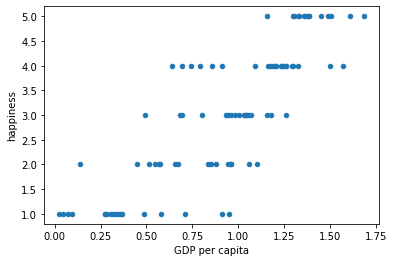

In [118]:
df.plot.scatter(x='GDP per capita', y='happiness')

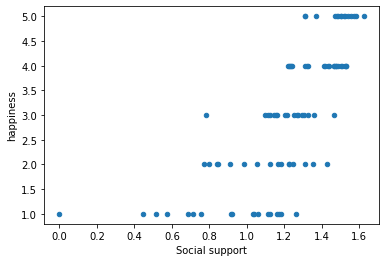

In [119]:
df.plot.scatter(x='Social support', y='happiness')

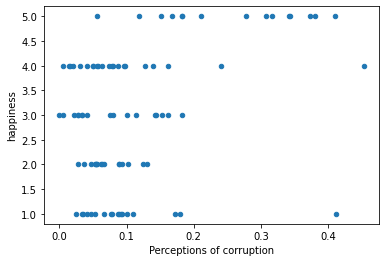

In [120]:
df.plot.scatter(x='Perceptions of corruption', y='happiness')

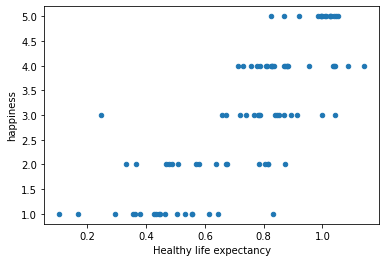

In [121]:
df.plot.scatter(x='Healthy life expectancy', y='happiness')

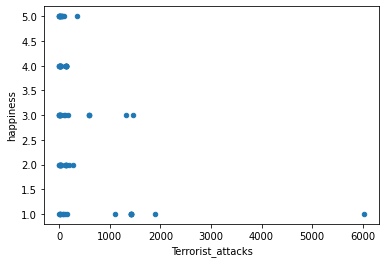

In [122]:
df.plot.scatter(x='Terrorist_attacks', y='happiness')

# Examine features that predict happiness categories using one or more models that allow for automatic feature selection
## Explain any meaningful findings

In [123]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [124]:
# Function to transform data with preprocessor
def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [125]:
preprocessor(X_train)

array([[ 0.10444464,  0.20603101,  0.45831144, ...,  0.        ,
         0.        ,  0.        ],
       [-0.54388211,  0.38059533,  0.37791099, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.64309205, -0.19786289,  1.07189386, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01356448,  1.10965806,  1.05919905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27261963, -0.30397062,  0.62334396, ...,  0.        ,
         0.        ,  0.        ],
       [-0.5950658 , -1.4198131 , -1.00582315, ...,  1.        ,
         0.        ,  0.        ]])

In [126]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(88, 26)

In [127]:
# Create proprocessor function a zip file
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [128]:
# Run RandomForestClassifier on processed data to find important variables/features

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators': range(1, 10)}
# model = GridSearchCV(RandomForestClassifier(n_estimators=300, max_depth=3),param_grid)
model = RandomForestClassifier(n_estimators=100, max_depth=5)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.9431818181818182

In [129]:
model.feature_importances_

array([2.24597513e-01, 1.31405899e-01, 1.45496995e-01, 9.92563630e-02,
       7.63647678e-02, 1.05108780e-01, 6.11664345e-02, 2.22049801e-02,
       9.86889960e-03, 1.20091477e-02, 2.10554976e-02, 6.92819256e-05,
       0.00000000e+00, 3.85264470e-03, 2.48275373e-03, 6.46728910e-03,
       1.30321552e-02, 3.68299020e-03, 7.00462771e-04, 5.98001139e-03,
       4.76333691e-03, 7.31085888e-03, 5.40270005e-03, 2.61866295e-02,
       3.23219879e-03, 8.30140894e-03])

In [130]:
for name, importance in zip(X_train.columns, model.feature_importances_):
    if(name not in ['Country or region', 'name']):
        print(name, importance)

GDP per capita 0.13140589866780852
Social support 0.14549699548673006
Healthy life expectancy 0.09925636300883818
Freedom to make life choices 0.07636476776849602
Generosity 0.1051087801452638
Perceptions of corruption 0.06116643450936699
region 0.0098688996003617
sub-region 0.012009147692201442
Terrorist_attacks 0.021055497612510486


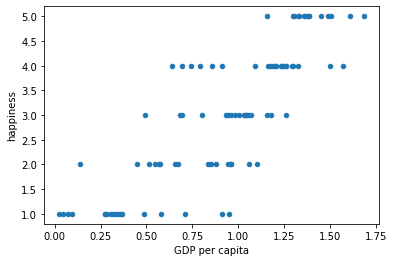

In [131]:
df.plot.scatter(x='GDP per capita', y='happiness')

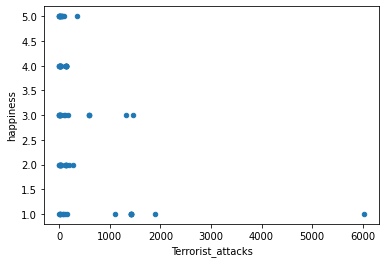

In [132]:
df.plot.scatter(x='Terrorist_attacks', y='happiness')

# Experiment with different prediction models to try to predict World Happiness well (Fit and compare, at minimum, three models)
## submit three models to the model share leaderboard before you start communicating with your team.
## After you submit your first three models, describe your best model with your team via your team slack channel
## Fit and submit up to three more models after learning from your team. Discuss which models you tried and which models performed better and point out relevant hyper-parameter values for successful models.
## Submit your best models to the leaderboard for the World Happiness AI Model Share competition.
### You have the option to present and/or discuss these models in your report, but it is not required.

In [133]:
# Log into modelshare.org with username/password credentials
from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://e2w6gh3id1.execute-api.us-east-2.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


# Model 1 - RandomForestClassifier
## Used GridSearchCV to optimize data. While I had expected this to perform the most optimally, it resulted in a mediocre performance, not performing the best or the worst. This seemed to be the consus among my team.

In [134]:
param_grid = {'n_estimators': range(95, 110), 'max_depth': range(5, 10)}
# model = RandomForestClassifier(n_estimators=100, max_depth=5)
# model = GridSearchCV(RandomForestClassifier(n_estimators=100, max_depth=5),param_grid)
# model = GridSearchCV(RandomForestClassifier(max_depth=5),param_grid)
model = GridSearchCV(RandomForestClassifier(),param_grid)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.


1.0

In [135]:
df_cv = pd.DataFrame(model.cv_results_)
df_cv.loc[df_cv.rank_test_score == 1]

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.122215      0.003706         0.010891        0.001818   

   param_max_depth param_n_estimators                                params  \
30               7                 95  {'max_depth': 7, 'n_estimators': 95}   

    split0_test_score  split1_test_score  split2_test_score  \
30           0.555556           0.777778           0.888889   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
30           0.705882           0.764706         0.738562        0.108976   

    rank_test_score  
30                1

In [136]:
model = RandomForestClassifier(n_estimators=108, max_depth=10)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

1.0

In [137]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [138]:
# Submit my model 1
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)
#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                           preprocessor_filepath="preprocessor.zip",
                           prediction_submission=prediction_labels,
                           custom_metadata = {"team":"6"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 608

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [139]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

# Model 2 - Keras Neural Networks
## I attempted to run GridSearchCV on Keras functions but instead ran manual trial-and-error runs for my results. My Keras Neural Networks performed the best

In [140]:
# https://machinelearningmastery.com/use-keras-deep-learning-models-scikit-learn-python/

%%capture

%pip install scikeras

In [141]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

# preprocessor handles the "correctification" of the raw data into usable form for machine learning
feature_count=preprocessor(X_train).shape[1] # count features in input data

keras_model = Sequential()
keras_model.add(Dense(100, input_dim=feature_count, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(32, activation='relu'))
keras_model.add(Dense(16, activation='relu'))

keras_model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Fitting the NN to the Training set
keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
               batch_size = 20, 
               epochs = 500, validation_split=0.25)  

Epoch 1/500
4/4 [==============================] - 1s 91ms/step - loss: 1.6022 - accuracy: 0.1061 - val_loss: 1.6267 - val_accuracy: 0.0909
Epoch 2/500
4/4 [==============================] - 0s 22ms/step - loss: 1.5964 - accuracy: 0.1364 - val_loss: 1.6256 - val_accuracy: 0.0455
Epoch 3/500
4/4 [==============================] - 0s 29ms/step - loss: 1.5895 - accuracy: 0.1061 - val_loss: 1.6232 - val_accuracy: 0.0455
Epoch 4/500
4/4 [==============================] - 0s 23ms/step - loss: 1.5835 - accuracy: 0.1212 - val_loss: 1.6212 - val_accuracy: 0.0455
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 1.5783 - accuracy: 0.1364 - val_loss: 1.6201 - val_accuracy: 0.0455
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 1.5731 - accuracy: 0.2273 - val_loss: 1.6186 - val_accuracy: 0.0455
Epoch 7/500
4/4 [==============================] - 0s 11ms/step - loss: 1.5684 - accuracy: 0.2121 - val_loss: 1.6167 - val_accuracy: 0.0455
Epoch 8/500
4/4 [===

In [142]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation
# from scikeras.wrappers import KerasClassifier

# # preprocessor handles the "correctification" of the raw data into usable form for machine learning
# feature_count=preprocessor(X_train).shape[1] # count features in input data

# keras_model = Sequential()
# keras_model.add(Dense(100, input_dim=feature_count, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(16, activation='relu'))

# keras_model.add(Dense(5, activation='softmax')) 
                                            
# # Compile model
# keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# model = KerasClassifier(model=keras_model, epochs=150, batch_size=10, verbose=0)

# param_grid = dict(epochs=[10,20,30],
#                   batch_size = [20,40])


# param_grid = {'optimizers': ['rmsprop', 'adam'],
#               'epochs': [50, 100, 150],
#               'batch_size': [5, 10, 20],
#               'init': ['glorot_uniform', 'normal', 'uniform']}

# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid)

# # # Fitting the NN to the Training set
# # keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
# #                batch_size = 20, 
# #                epochs = 500, validation_split=0.25)  

# grid_result = grid.fit(preprocessor(X_train), y_train)

In [143]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation
# from sklearn.metrics import make_scorer
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# # preprocessor handles the "correctification" of the raw data into usable form for machine learning
# feature_count=preprocessor(X_train).shape[1] # count features in input data

# keras_model = Sequential()
# keras_model.add(Dense(100, input_dim=feature_count, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(16, activation='relu'))

# keras_model.add(Dense(5, activation='softmax')) 
                                            
# # Compile model
# keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# batches = [1, 4, 8, 16]
# epochs = [50, 100]
# learning_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# beta_1=[0.9]
# beta_2=[0.999]
# epsilon=[1e-07]
# activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# weight_constraint = [1, 2, 3, 4, 5]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# neurons_first_layer=[1, 5, 10, 15, 20, 25, 30]
# neurons_second_layer=[1, 5, 10, 15, 20, 25, 30]

# param_grid = dict(
#      batch_size=batches
#     ,epochs=epochs
#     ,learning_rate=learning_rate
#     ,init_mode=init_mode
#     ,beta_1=beta_1
#     ,beta_2=beta_2
#     ,epsilon=epsilon
#     ,activation=activation
#     ,dropout_rate=dropout_rate
#     ,weight_constraint=weight_constraint
#     ,neurons_first_layer=neurons_first_layer
#     ,neurons_second_layer=neurons_second_layer
# )

# scorers = {
#         'precision_score': make_scorer(precision_score),
#         'recall_score': make_scorer(recall_score),
#         'accuracy_score': make_scorer(accuracy_score)
#         }

# grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring=scorers, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)

In [144]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation

# # preprocessor handles the "correctification" of the raw data into usable form for machine learning
# feature_count=preprocessor(X_train).shape[1] # count features in input data

# keras_model = Sequential()
# keras_model.add(Dense(100, input_dim=feature_count, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(32, activation='relu'))
# keras_model.add(Dense(16, activation='relu'))

# keras_model.add(Dense(5, activation='softmax')) 
                                            
# # Compile model
# # keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# keras_model.add(Activation('softmax')) # This special "softmax" a
# keras_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 

# # # Fitting the NN to the Training set
# # keras_model.fit(preprocessor(X_train), y_train, ## Note that keras models require a one-hot-encoded y_train object
# #                batch_size = 20, 
# #                epochs = 500, validation_split=0.25)  


# model = KerasClassifier(model=keras_model)
# # model = KerasClassifier(model=keras_model, epochs=150, batch_size=10, verbose=0)


# param_grid = {'optimizers': ['rmsprop', 'adam'],
#               'epochs': [50, 100, 150],
#               'batch_size': [5, 10, 20],
#               'init': ['glorot_uniform', 'normal', 'uniform']}

# # optimizers = ['rmsprop', 'adam']
# # init = ['glorot_uniform', 'normal', 'uniform']
# # epochs = np.array([50, 100, 150])
# # batches = np.array([5, 10, 20])
# # param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)
# # grid = GridSearchCV(estimator=model, param_grid=param_grid)
# # grid_result = grid.fit(X_train, Y_train)

# # Fitting the NN to the Training set
# grid_result = GridSearchCV(estimator=model, 
#                            param_grid=param_grid)

#  ## Note that keras models require a one-hot-encoded y_train object
# grid_result.fit(preprocessor(X_train), y_train)

In [145]:
# Create local onnx file for upload
onnx_model = model_to_onnx(keras_model, framework='keras',
                          transfer_learning=False,
                          deep_learning=True)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [146]:
#-- Generate predicted y values
#Note: Keras predict returns the predicted column index location for classification models
prediction_column_index=keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels 
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

3/3 [==============================] - 0s 5ms/step


In [147]:
# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels,
                                 custom_metadata = {"team":"6"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 609

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [148]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)

# Model 3 - Gradient Boosting
## After my conversations with my team, I had expected Gradient Boosting to perform the best. Interestingly, after the GridSearchCV analysis of Gradient Boosting, it was the worst performing model by far.

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [150]:
# model = GradientBoostingClassifier(n_estimators=50,
#                                    learning_rate=1.0,
#                                    max_depth=1,
#                                    random_state=0).fit(preprocessor(X_train), y_train_labels)

param_grid = {'n_estimators': range(50, 100), 'max_depth': range(1, 5)}
model = GridSearchCV(GradientBoostingClassifier(learning_rate=1.0,
                                                random_state=0),
                     param_grid).fit(preprocessor(X_train), y_train_labels)
model.score(preprocessor(X_train), y_train_labels)

1.0

In [151]:
feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [152]:
prediction_labels = model.predict(preprocessor(X_test))

# Submit model to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                            preprocessor_filepath="preprocessor.zip",
                            prediction_submission=prediction_labels,
                            custom_metadata = {"team":"6"})

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 610

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:3164


In [153]:
# Get leaderboard to explore current best model architectures

# Get raw data in pandas data frame
data = mycompetition.get_leaderboard()

# Stylize leaderboard data
mycompetition.stylize_leaderboard(data)